In [1]:
import numpy as np
from simulation import *
from math import *
import matplotlib.pyplot as plt
from IPython.display import Image
meterial = meterial_s
def print_meterial(m): 
    pass 
degree = pi/180

[0] → regist_plugin (test_fresnel:132)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (test_grid_info:47)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (test_source:149)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (test_zernike:83)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (basic_structure:19)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (fresnel:63)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (geometry:4)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (simulation_grid_info:33)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (source_grid:103)
[0] ← regist_plugin (time: 0ms)
[0] → regist_plugin (thin_mask:29)
[0] ← regist_plugin (time: 0ms)


In [2]:
def reflection_example():
    air , ResistSL, BARC, C, Si,  = meterial(), meterial(), meterial(), meterial(), meterial()

    air.nk     = 1
    ResistSL.nk= 0.98 + 0.005j
    BARC.nk    = 1.2  + 0.05j
    C.nk       = 0.962+ 0.007j
    Si.nk      = 0.999+ 0.002j

    ResistSL.depth = 40
    BARC.depth     = 20 
    C.depth        = 30 
    Si.depth       =  0

    
    th_0 = np.arcsin(0.24)
    meterials = [air, ResistSL, BARC, C, Si, air]
    dir = TMM_propagate_direction(meterials, th_0)
    wl = 13.5
    tmm_list1 = TMM_interface_transfer_matrix_with_thickness_without_multiply_s(meterials, dir, wl)
    tmm_list = TMM_apply_multilayer_effect(tmm_list1)
    rs, ts = TMM_get_r_t_from_tmm(tmm_list[-1])
    print(f"rs={rs} ts={ts}")

    tmm_list1 = TMM_interface_transfer_matrix_with_thickness_without_multiply_p(meterials, dir, wl)
    tmm_list = TMM_apply_multilayer_effect(tmm_list1)
    rp, tp = TMM_get_r_t_from_tmm(tmm_list[-1])
    print(f"rp={rp} tp={tp}")

    print("result from kx:")
    print('''
        K>> r_s

        r_s =

        0.082827018253689 + 0.095067957492916i

        K>> r_p

        r_p =

        0.074057753110956 + 0.086317925914788i

        K>> t_s

        t_s =

        -0.351789179415013 - 0.358934290265760i

        K>> t_p

        t_p =

        -0.352694213669353 - 0.360272632413191i
''')
reflection_example()

rs=(0.08256159722805023+0.09492852538824081j) ts=(-0.35126951336860657-0.3591756522655487j)
rp=(-0.07382181286811829-0.08619353920221329j) tp=(-0.3521626889705658-0.3605029582977295j)
result from kx:

        K>> r_s

        r_s =

        0.082827018253689 + 0.095067957492916i

        K>> r_p

        r_p =

        0.074057753110956 + 0.086317925914788i

        K>> t_s

        t_s =

        -0.351789179415013 - 0.358934290265760i

        K>> t_p

        t_p =

        -0.352694213669353 - 0.360272632413191i



In [ ]:

import sys
sys.path.append('../virtuallab/tools')
from common import *
if False:
    SiO = ri.RefractiveIndexMaterial(shelf=None, book='SiO', page=None)
    wavelength_nm = 600
    refractive_index = SiO.get_refractive_index(wavelength_nm)
    expected_refractive_index = 1.96553846
    assert(isclose(refractive_index, expected_refractive_index))

    extinction_coefficient = SiO.get_extinction_coefficient(wavelength_nm)
    expected_extinction_coefficient = 0.001
    assert(isclose(extinction_coefficient, expected_extinction_coefficient))
DB = ri.RefractiveIndex(databasePath=db_path)
print(DB.getMaterialFilename('SiO2', page='Malitson'))
print(DB.getMaterialFilename('Ta2O5'))
print(DB.getMaterialFilename('Si'))


m_SiO2  = ri.RefractiveIndexMaterial(shelf=None, book='SiO2', page='Malitson')
m_Ta2O5 = ri.RefractiveIndexMaterial(shelf=None, book='Ta2O5', page=None)
m_Si    = ri.RefractiveIndexMaterial(shelf=None, book='Si', page=None)

def OB_AR625_655(wl_0=532, angle=0, wl_lb = 300.09, wl_ub=1e3):

    def get_nk(m, wl_in_nm):
        a = m.get_refractive_index(wl_in_nm)  + 0j
        try:
            a = a + 1j *m.get_extinction_coefficient(wl_in_nm)
        except Exception as e:
            pass
        return a

    def make_meterial(nk, depth):
        m = meterial()
        m.nk = nk
        m.depth = depth
        return m

    th_0 = angle * np.pi/180
    air = meterial()
    air.nk = 1

    def calc(wl):
        # film stack
        SiO2_nk = get_nk(m_SiO2, wl)
        Ta2O5_nk= get_nk(m_Ta2O5, wl)
        nk_list        =[SiO2_nk, Ta2O5_nk, SiO2_nk, Ta2O5_nk, SiO2_nk]
        thickness_list = [247.35, 16.99, 276.02, 43.96, 128.74]
        film_list = [make_meterial(n, d) for n, d in zip(nk_list, thickness_list)]
        Si = meterial()
        Si.nk = get_nk(m_Si, wl)
        input = [air]
        for film in reversed(film_list):
            input.append(film)
        input.append(Si)

        dir = TMM_propagate_direction(input, th_0)
        rs,ts = TMM_get_r_t_power_from_tmm_s(
            TMM_interface_transfer_matrix_with_thickness_s(input, dir, wl)[-1],
            input[0].nk, dir[0], input[-1].nk, dir[-1]
        )
        rp,tp = TMM_get_r_t_power_from_tmm_p(
            TMM_interface_transfer_matrix_with_thickness_p(input, dir, wl)[-1],
            input[0].nk, dir[0], input[-1].nk, dir[-1]
        )
        return rs,ts, rp,tp
    TE_R, TE_T, TM_R, TM_T = calc(wl_0)
    print(f"* test with wavelength={wl_0}, incidence={angle}")
    print("             \tTE\tTM")
    print("Reflectance \t{:.5f}\t{:.5f}".format(TE_R, TM_R))
    print("Transmittance\t{:.5f}\t{:.5f}".format(TE_T, TM_T))

    wl_in_nm = np.linspace(wl_lb, wl_ub, 1000)
    TE_R_list = []
    TM_R_list = []
    for wl in wl_in_nm:
        TE_R, TE_T, TM_R, TM_T = calc(wl)
        TE_R_list.append(TE_R)
        TM_R_list.append(TM_R)
    plt.figure()
    plt.plot([x*1e-3 for x in wl_in_nm], [r*1e2 for r in TE_R_list], label = "Reflectance(TE)", color= "blue")
    if angle != 0:
        plt.plot([x*1e-3 for x in wl_in_nm], [r*1e2 for r in TM_R_list], label = "Reflectance(TM)", color= "red")
    plt.xlabel('wavelength (um)')
    plt.ylabel('Reflectance[%]')
    plt.legend(loc="upper right")
    plt.title(f'Reflectance(TE) $\\alpha$={angle}$^\\circ$')
    plt.show()

/home/like/repos/infrastructure/kernels/virtuallab/pynb/filmstack/material/refractiveindex.info-database/data-nk/main/SiO2/Malitson.yml
/home/like/repos/infrastructure/kernels/virtuallab/pynb/filmstack/material/refractiveindex.info-database/data-nk/main/Ta2O5/Bright-amorphous.yml
/home/like/repos/infrastructure/kernels/virtuallab/pynb/filmstack/material/refractiveindex.info-database/data-nk/main/Si/Aspnes.yml


* test with wavelength=532, incidence=0
             	TE	TM
Reflectance 	0.06842	0.06842
Transmittance	0.92925	0.92925


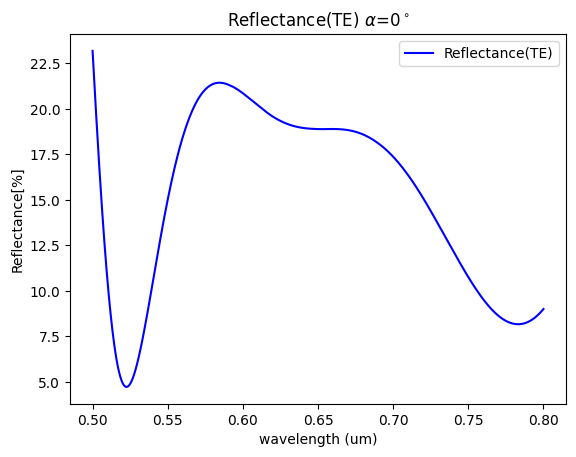

In [4]:
OB_AR625_655(wl_0 = 532, angle = 0, wl_lb=500, wl_ub=800)

###  
- golden result  
![test_0](resources/0/test_0.png)

![test_1](resources/0/test_1.png)

In [5]:
OB_AR625_655(wl_0 = 532, angle = 70, wl_lb=300.09, wl_ub=1e3)

* test with wavelength=532, incidence=70
             	TE	TM
Reflectance 	0.39690	0.16607
Transmittance	0.60098	0.83223


Exception: Wavelength 0.30008999999999997 um is out of bounds. Correct range: (0.5 um, 1000.0 um)

###  
- golden result  
![test_0](resources/1/test_0.png)

![test_1](resources/1/test_1.png)